In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [46]:
#loading dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
#(50000, 32, 32, 3)-which mean there are 50000 training images of size 32x32. 3 represents rgb

(50000, 32, 32, 3)

In [47]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [48]:
#converting y_train and y_test from 2D array to 1D array for simplicity
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [49]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [50]:
#sample data visualization
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

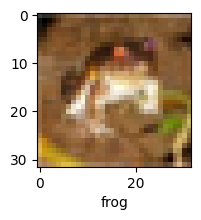

In [51]:
plot_sample(X_train, y_train, 0)

In [52]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [53]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),



    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [95]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,099,584 (4.19 MB)

 Trainable params: 366,442 (1.40 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 732,886 (2.80 MB)

In [54]:
cnn.compile(optimizer=Adam(learning_rate = 0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
#cnn.fit(X_train, y_train, epochs=15)
history = cnn.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.2173 - loss: 2.1408 - val_accuracy: 0.3952 - val_loss: 1.7036
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.3835 - loss: 1.7012 - val_accuracy: 0.4979 - val_loss: 1.4185
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.4588 - loss: 1.5172 - val_accuracy: 0.5022 - val_loss: 1.3889
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.5104 - loss: 1.3652 - val_accuracy: 0.5701 - val_loss: 1.2235
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5485 - loss: 1.2693 - val_accuracy: 0.6033 - val_loss: 1.1327
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5835 - loss: 1.1816 - val_accuracy: 0.6233 - val_loss: 1.0829
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.6144 - loss: 1.1069 - val_accuracy: 0.6213 - val_loss: 1.0660
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.6373 - loss: 1.0431 - 

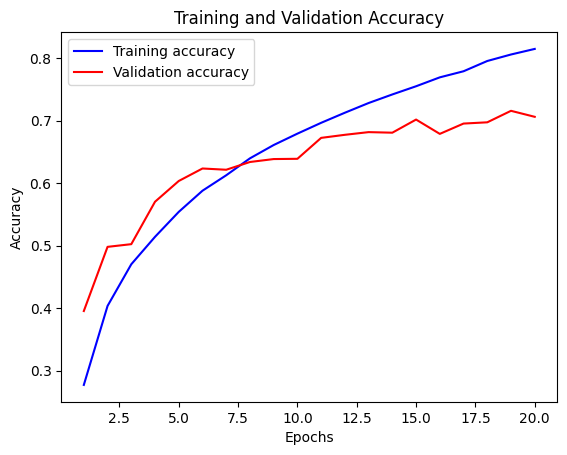

In [56]:
#comparing train and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Creating a range of epochs for plotting
epochs = range(1, len(train_accuracy) + 1)

# Plotting train and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
loss, test_accuracy = cnn.evaluate(X_test,y_test)
print("test accuracy =", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7078 - loss: 0.9257
test accuracy = 0.7038000226020813


In [58]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[2.2932063e-04, 5.9828995e-05, 3.2454235e-03, 8.3932948e-01,
        3.0899842e-03, 1.4035416e-01, 1.1997812e-02, 1.3741967e-03,
        2.7941154e-05, 2.9188191e-04],
       [1.5581488e-03, 7.0393100e-05, 7.0191963e-06, 2.1973324e-06,
        1.7350689e-07, 1.2255269e-07, 3.2921113e-07, 2.6102316e-07,
        9.9835098e-01, 1.0478359e-05],
       [6.1581874e-01, 1.4061457e-02, 1.8362381e-02, 5.4133157e-03,
        6.9143339e-03, 8.9377922e-04, 1.8645428e-03, 2.2961351e-03,
        3.2284284e-01, 1.1532437e-02],
       [9.5018023e-01, 2.1963501e-03, 2.6775286e-02, 6.9631194e-04,
        5.1123300e-03, 7.3044568e-05, 5.0188892e-04, 3.4213616e-04,
        1.3311174e-02, 8.1128749e-04],
       [5.0323865e-07, 2.6576370e-08, 1.1252204e-03, 1.4102074e-03,
        2.7998048e-03, 2.8405393e-05, 9.9463540e-01, 3.2452016e-07,
        2.5202731e-08, 2.2807400e-09]], dtype=float32)

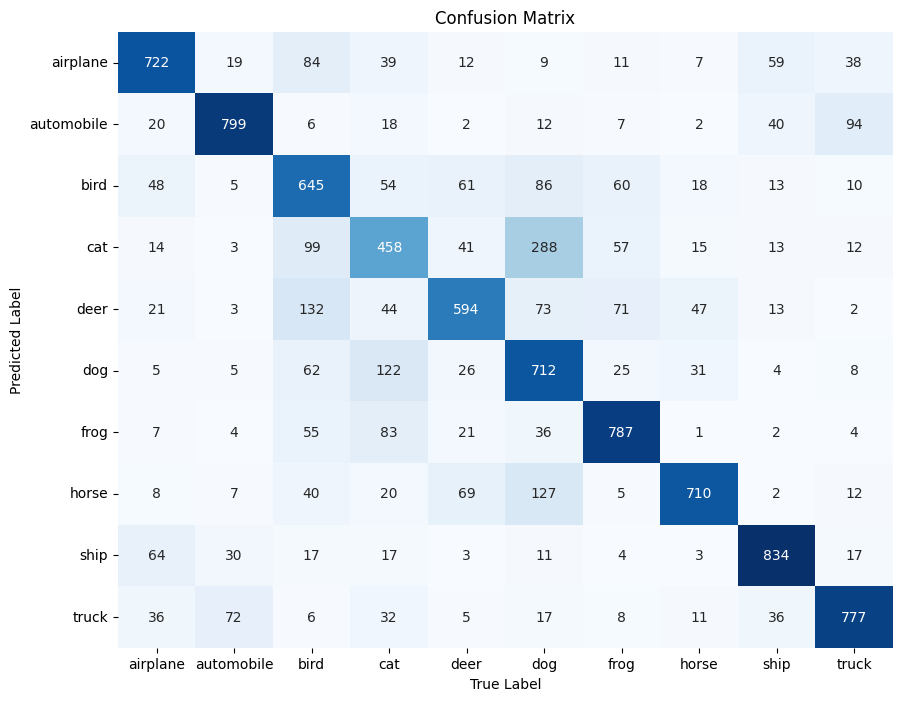

Indices where the model fails more than 70 times:
True Label: bird, Predicted Label: airplane, Indices: [129 249 674 692 701]
True Label: truck, Predicted Label: automobile, Indices: [172 293 532 734 744]
True Label: dog, Predicted Label: bird, Indices: [275 345 460 483 551]
True Label: bird, Predicted Label: cat, Indices: [ 35  70  84 118 436]
True Label: dog, Predicted Label: cat, Indices: [ 33  42 200 262 488]
True Label: bird, Predicted Label: deer, Indices: [219 270 393 564 618]
True Label: dog, Predicted Label: deer, Indices: [  24 1228 1308 1506 2061]
True Label: frog, Predicted Label: deer, Indices: [2222 2377 3160 3605 3711]
True Label: cat, Predicted Label: dog, Indices: [ 61  68  78  91 143]
True Label: cat, Predicted Label: frog, Indices: [103 245 256 456 688]
True Label: dog, Predicted Label: horse, Indices: [  85  168  343  518 1329]
True Label: automobile, Predicted Label: truck, Indices: [201 668 723 771 836]


In [91]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_and_failed_indices(y_true, y_pred, class_names, threshold=100):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()
    
    # Extract indices where the model fails more than the threshold
    failed_indices = []
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if conf_matrix[i, j] > threshold and i != j:
                # Extract the indices where the model fails more than the threshold
                indices = np.where((y_true == j) & (y_pred == i))[0][:5]
                failed_indices.append((i, j, indices))
    
    if failed_indices:
        print("Indices where the model fails more than", threshold, "times:")
        for failure in failed_indices:
            print(f"True Label: {class_names[failure[1]]}, Predicted Label: {class_names[failure[0]]}, Indices: {failure[2]}")
    else:
        print("No indices where the model fails more than", threshold, "times.")

    return failed_indices


# Convert continuous predictions to integer class labels
y_pred_int = np.argmax(y_pred, axis=1)



# Assuming y_test and y_pred are the true labels and predictions
f_index = plot_confusion_matrix_and_failed_indices(y_test, y_pred_int, classes, threshold=70)


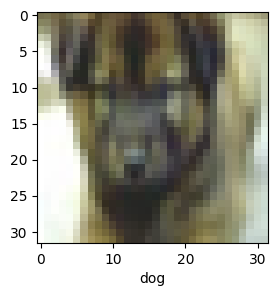

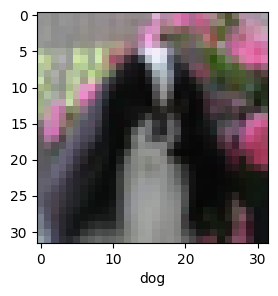

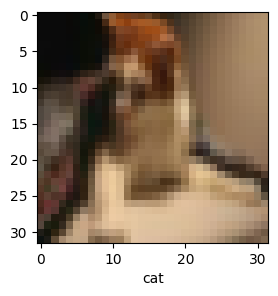

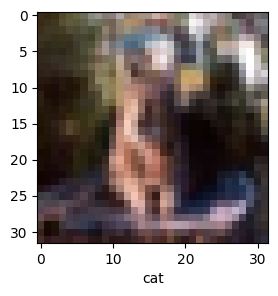

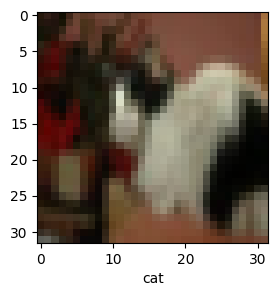

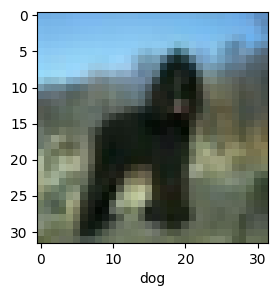

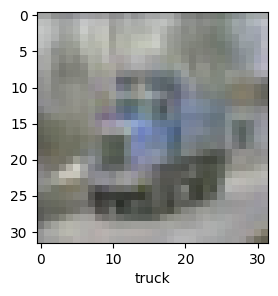

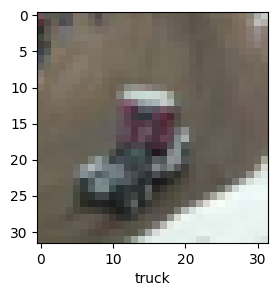

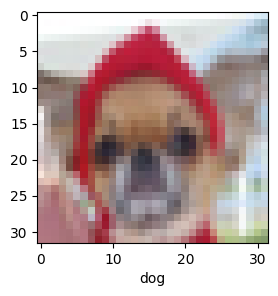

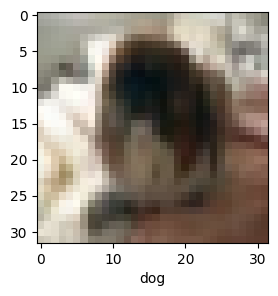

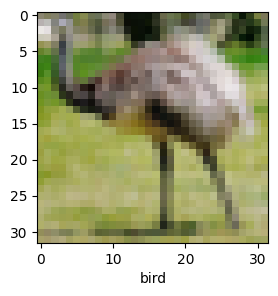

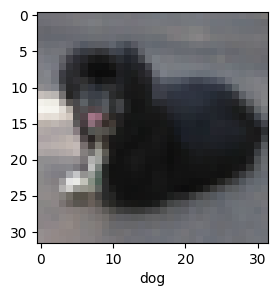

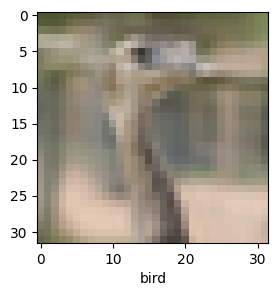

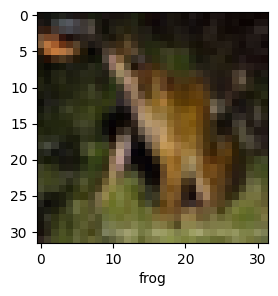

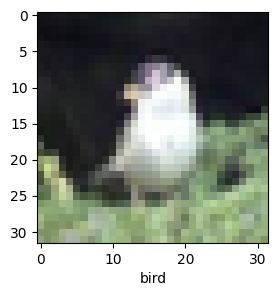

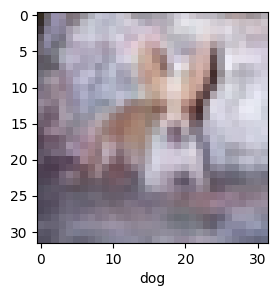

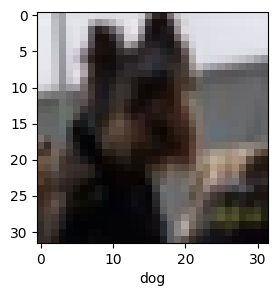

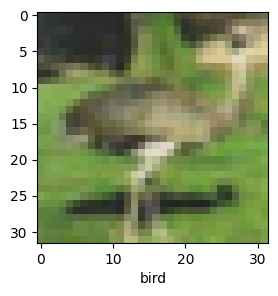

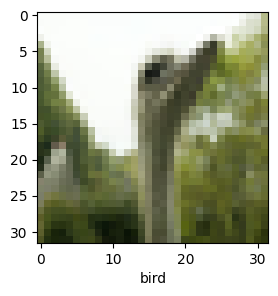

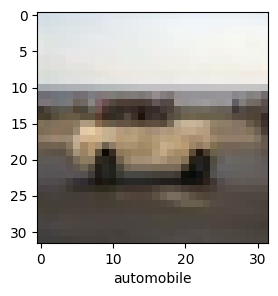

In [101]:
#sample data visualization
def plot_sample(X, y, index):
    for i in index:
        plt.figure(figsize = (3,3))
        plt.imshow(X[i])
        plt.xlabel(classes[y[i]])
        plt.savefig(f'image{i}')


def human_test_images(index_array):
    plot_sample(X_test,y_test, index_array)

human_test_images([33,42,61,68,78,85,172,744,168,200,219,262,270,2222,393,488,518,564,618,201])

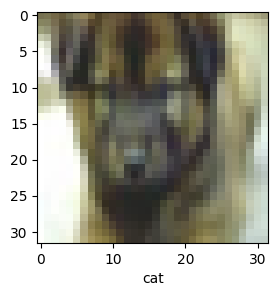

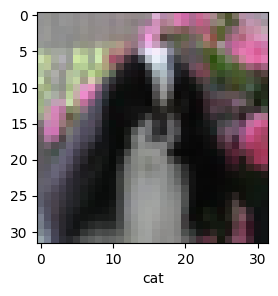

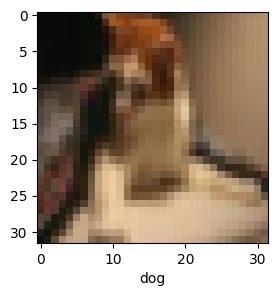

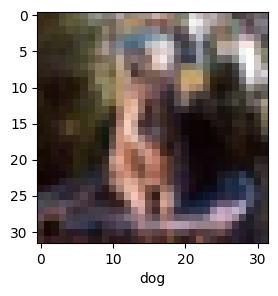

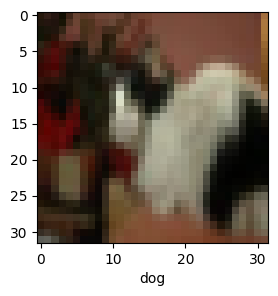

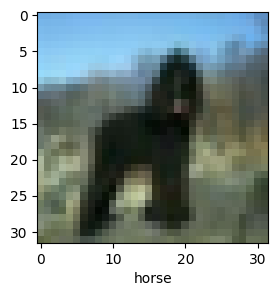

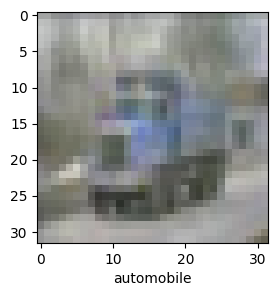

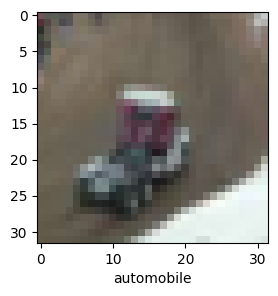

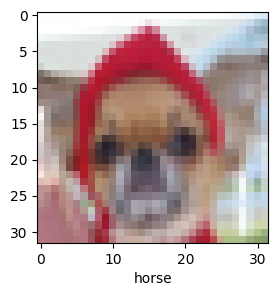

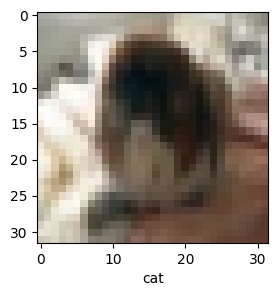

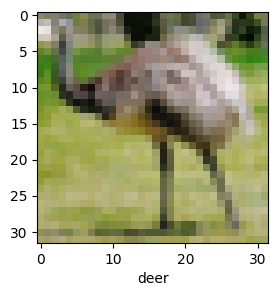

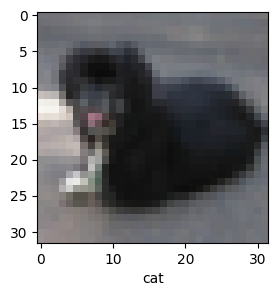

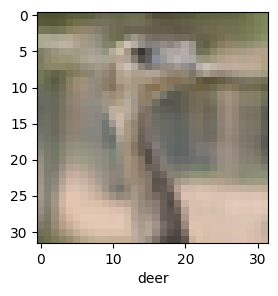

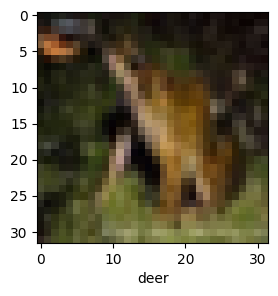

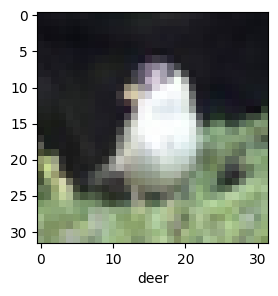

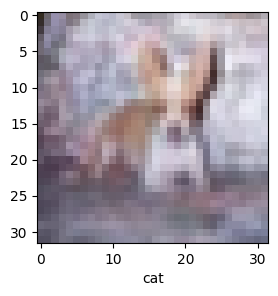

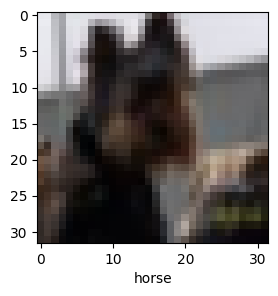

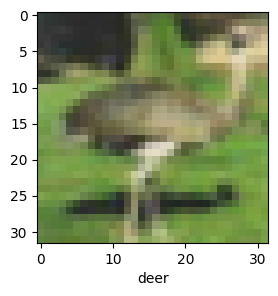

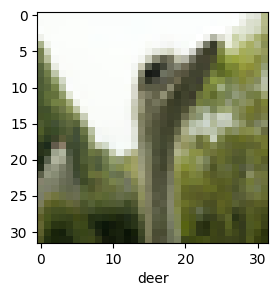

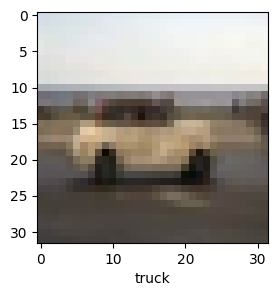

In [102]:
#sample data visualization
def plot_sample_test(X, y, index):
    for i in index:
        plt.figure(figsize = (3,3))
        plt.imshow(X[i])
        plt.xlabel(classes[y_pred_int[i]])
        plt.savefig(f'test{i}')

def pred_test_images(index_array):
    plot_sample_test(X_test,y_pred, index_array)

pred_test_images([33,42,61,68,78,85,172,744,168,200,219,262,270,2222,393,488,518,564,618,201])